In [1]:
import numpy as np
import matplotlib.pyplot as plt
def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num)
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'k.:')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()

    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 array([[<AxesSubplot:title={'center':'$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>]],
       dtype=object))

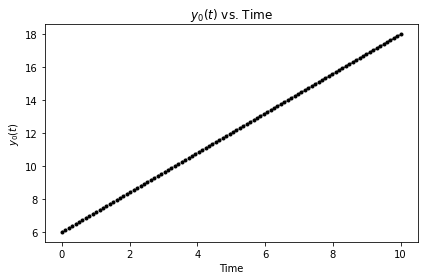

In [3]:
##Constant Rate of Change

from scipy.integrate import solve_ivp


# %% Define independent function and derivative function
def f(t, y, c):
    dydt = [c[0]]
    return dydt

# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 10, 100)
yinit = [6]
c = [1.2]

# %% Solve differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

# %% Plot states
state_plotter(sol.t, sol.y, 1)

(<Figure size 432x288 with 1 Axes>,
 array([[<AxesSubplot:title={'center':'$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>]],
       dtype=object))

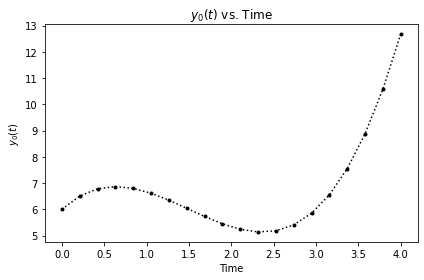

In [5]:
# %% Time-dependent Rate of Change
# %% Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# %% Define derivative function
def f(t, y, c):
    dydt = np.polyval(c, t)
    return dydt
    
# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 4, 20)
yinit = [6]
c = [2, -6, 3]

# %% Solve differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

# %% Plot states
state_plotter(sol.t, sol.y, 1)

(<Figure size 432x288 with 2 Axes>,
 array([[<AxesSubplot:title={'center':'$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>,
         <AxesSubplot:title={'center':'$y_1(t)$ vs. Time'}, xlabel='Time', ylabel='$y_1(t)$'>]],
       dtype=object))

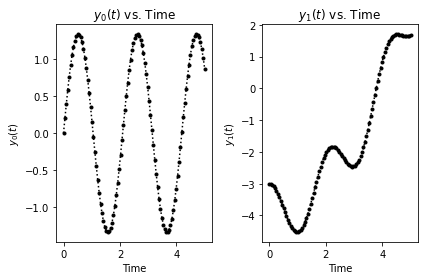

In [6]:
#Multiple Variable Models
# %% Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# %% Define derivative function
def f(t, y, c):
    dydt = [c[0]*np.cos(c[1]*t), c[2]*y[0]+c[3]*t]
    return dydt

# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 5, 100)
yinit = [0, -3]
c = [4, 3, -2, 0.5]

# %% Solve differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

# %% Plot states
state_plotter(sol.t, sol.y, 1)

(<Figure size 432x288 with 3 Axes>,
 array([[<AxesSubplot:title={'center':'$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>,
         <AxesSubplot:title={'center':'$y_1(t)$ vs. Time'}, xlabel='Time', ylabel='$y_1(t)$'>],
        [<AxesSubplot:title={'center':'$y_2(t)$ vs. Time'}, xlabel='Time', ylabel='$y_2(t)$'>,
         <AxesSubplot:>]], dtype=object))

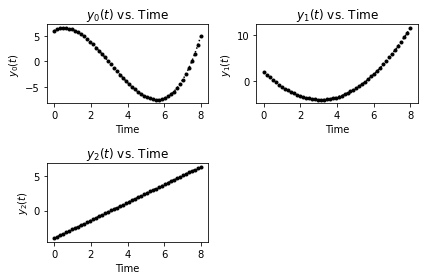

In [7]:
#Higher Order Differential Equations
# %% Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# %% Define derivative function
def f(t, y, c):
    dydt = [y[1], y[2], c[0]]
    return dydt

# %% Define time spans, initial values, and constants
tspan = np.linspace(0, 8, 50)
yinit = [6, 2, -4]
c = [1.3]

# %% Solve differential equation
sol = solve_ivp(lambda t, y: f(t, y, c), 
                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)

# %% Plot states
state_plotter(sol.t, sol.y, 1)